# Proyecto Marketing Bancario
---
Equipo 1:

| Nombre | apellido |
| ---- | ---- |
| Melany Odet | Castañeda Bazaldúa |
| Genesis Guadalupe | Ibarra Iturbe |
| Silvestre | Hernandez Hernandez |
| Alan Aarón | Martinez Celedonio |



## Datos de la actividad

### Descripción de Variables del Dataset de Marketing Bancario

Este dataset contiene datos de una campaña de marketing bancario, donde se recopiló información sobre interacciones con clientes con el objetivo de predecir la efectividad de las campañas y mejorar las estrategias futuras. Los datos ofrecen una visión comprensiva sobre las características de los clientes y su respuesta a las campañas de telemarketing, permitiendo a los analistas explorar y descubrir patrones que pueden mejorar la efectividad de las futuras acciones de marketing. El análisis de este dataset ayudará a responder preguntas clave como la influencia del perfil demográfico y financiero del cliente en su disposición a suscribir nuevos servicios bancarios.

- **Edad**: Edad del cliente.
- **Trabajo**: Tipo de trabajo del cliente (ej. 'admin.', 'technician', 'services', etc.).
- **Estado_Civil**: Estado civil del cliente (ej. 'married', 'single', 'divorced').
- **Educacion**: Nivel educativo del cliente (ej. 'primary', 'secondary', 'tertiary').
- **Default**: Indica si el cliente tiene crédito en mora ('yes', 'no').
- **Balance**: Saldo anual promedio, en euros.
- **Vivienda**: Indica si el cliente tiene un préstamo de vivienda ('yes', 'no').
- **Prestamo**: Indica si el cliente tiene un préstamo personal ('yes', 'no').
- **Contacto**: Tipo de comunicación de contacto utilizada (ej. 'telephone', 'cellular', 'unknown').
- **Dia**: Día del mes en que se realizó el último contacto.
- **Mes**: Mes del año en que se realizó el último contacto (ej. 'jan', 'feb', 'mar', etc.).
- **Duracion**: Duración del último contacto, en segundos.
- **Campania**: Número de contactos realizados durante esta campaña y para este cliente.
- **Pdias**: Número de días que pasaron después de que el cliente fue contactado por última vez desde una campaña anterior.
- **Anterior**: Número de contactos realizados antes de esta campaña y para este cliente.
- **Resultado_Anterior**: Resultado de la campaña de marketing anterior (ej. 'failure', 'nonexistent', 'success').
- **Deposito**: Indica si el cliente ha suscrito un depósito a plazo ('yes', 'no').

Importación de librerias

In [17]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
import plotly.graph_objects as go
import plotly.express as px

## Criterios a cumplir

### Datos cargados y Visualizados Correctamente

Esta sección importa las bibliotecas necesarias y carga el dataset desde un archivo CSV. Luego muestra las primeras filas del dataset y la información general sobre las columnas.

In [3]:
# Carga de datos
df = pd.read_csv('Marketing.csv')
print("Primeras filas del dataset:")
print(df.head())
print("\nInformación del dataset:")
print(df.info())


Primeras filas del dataset:
   Edad     Trabajo Estado_Civil  Educacion Default  Balance Vivienda  \
0    59      admin.      married  secondary      no     2343      yes   
1    56      admin.      married  secondary      no       45       no   
2    41  technician      married  secondary      no     1270      yes   
3    55    services      married  secondary      no     2476      yes   
4    54      admin.      married   tertiary      no      184       no   

  Prestamo Contacto  Dia  Mes  Duracion  Campania  Pdias  Anterior  \
0       no  unknown    5  may      1042         1     -1         0   
1       no  unknown    5  may      1467         1     -1         0   
2       no  unknown    5  may      1389         1     -1         0   
3       no  unknown    5  may       579         1     -1         0   
4       no  unknown    5  may       673         2     -1         0   

  Resultado_Anterior Deposito  
0            unknown      yes  
1            unknown      yes  
2            unk

Este dataset contiene información detallada sobre una campaña de marketing realizada por un banco, abarcando un total de 11,162 clientes y 17 características por cliente. La información se puede categorizar en tres grandes áreas:

### Datos Personales
- Edad
- Trabajo
- Estado civil
- Educación

### Datos Financieros
- Balance
- Préstamos
- Hipotecas

### Detalles de la Campaña
- Duración de llamadas
- Fechas de contacto
- Resultado (si el cliente hizo un depósito o no)

### Tipos de Datos
- **Numéricos**: edad, balance, duración de llamadas
- **Categóricos**: trabajo, estado civil, resultado de la campaña

### Calidad de Datos
El dataset no presenta valores nulos evidentes.

### Posible Uso
Este dataset es ideal para analizar los factores que influyen en la decisión de un cliente de hacer un depósito, con el fin de mejorar futuras campañas de marketing. Permite estudiar el comportamiento de los clientes y evaluar la efectividad de las estrategias de marketing bancario empleadas.

### Exploración de Inicial de Datos

Aquí se muestran estadísticas descriptivas básicas del dataset y el número de valores únicos en cada columna, lo que nos da una visión general de los datos.

In [4]:
# 2. Exploración Inicial de Datos
print("\nEstadísticas descriptivas:")
print(df.describe())


Estadísticas descriptivas:
               Edad       Balance           Dia      Duracion      Campania  \
count  11162.000000  11162.000000  11162.000000  11162.000000  11162.000000   
mean      41.231948   1528.538524     15.658036    371.993818      2.508421   
std       11.913369   3225.413326      8.420740    347.128386      2.722077   
min       18.000000  -6847.000000      1.000000      2.000000      1.000000   
25%       32.000000    122.000000      8.000000    138.000000      1.000000   
50%       39.000000    550.000000     15.000000    255.000000      2.000000   
75%       49.000000   1708.000000     22.000000    496.000000      3.000000   
max       95.000000  81204.000000     31.000000   3881.000000     63.000000   

              Pdias      Anterior  
count  11162.000000  11162.000000  
mean      51.330407      0.832557  
std      108.758282      2.292007  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%     

## Valores Únicos por Columna

El análisis de los valores únicos en cada columna del dataset proporciona una visión detallada de la diversidad de datos disponibles. A continuación, se presenta el número de valores únicos para cada columna:


In [5]:
print("\nNúmero de valores únicos por columna:")
print(df.nunique())


Número de valores únicos por columna:
Edad                    76
Trabajo                 12
Estado_Civil             3
Educacion                4
Default                  2
Balance               3805
Vivienda                 2
Prestamo                 2
Contacto                 3
Dia                     31
Mes                     12
Duracion              1428
Campania                36
Pdias                  472
Anterior                34
Resultado_Anterior       4
Deposito                 2
dtype: int64



### Interpretación
Esta distribución de valores únicos por columna indica la variedad y la naturaleza de los datos en el dataset. Por ejemplo:
- **Edad** y **Balance** muestran una alta variabilidad con 76 y 3805 valores únicos respectivamente.
- **Trabajo** y **Educación** tienen una diversidad moderada, con 12 y 4 categorías diferentes.
- Las columnas **Default**, **Vivienda**, y **Préstamo** tienen solo 2 valores únicos cada una, indicando respuestas binarias (por ejemplo, "Sí" o "No").
- La columna **Depósito**, que es la variable objetivo, también tiene 2 valores únicos, reflejando la decisión binaria del cliente.

Estos insights son fundamentales para entender la estructura de los datos y para diseñar estrategias de análisis y modelado adecuadas.


## Limpieza de datos

Esta parte trata los valores atípicos  en las columnas considerendo las características de cada columna y las posibles acciones de limpieza. Basándonos en la información inicial y en las prácticas comunes de limpieza de datos.


## Edad: Verificación y Tratamiento de Valores

### Verificación de Rango Válido
Se verifica que todos los valores de la columna **Edad** estén dentro de un rango razonable. Para este análisis, se considera un rango válido de 18 a 100 años.

### Tratamiento de Valores Atípicos
Se tratan los valores atípicos ajustando cualquier edad que esté fuera del rango de 18 a 100 años. Esto asegura que no haya edades extremadamente altas o bajas que no sean realistas.


In [6]:
# 1. Edad: Verificación de rango válido (suponemos rango razonable entre 18 y 100)
df['Edad'] = df['Edad'].clip(lower=18, upper=100)

### Interpretación
Este proceso ayuda a garantizar que los datos de edad sean consistentes y realistas. Al limitar las edades al rango de 18 a 100 años, se evita que valores inusuales o errores en los datos afecten el análisis. Esto es importante para obtener resultados precisos y significativos en el análisis de los datos.

## Duración: Verificación y Tratamiento de Valores

### Verificación de Rango Válido
Se asegura que los valores de la columna **Duración** estén dentro de un rango razonable. Por ejemplo, no deberían existir duraciones negativas.

### Tratamiento de Valores Atípicos
Se tratan las duraciones extremadamente altas utilizando el método del rango intercuartílico (IQR) para identificar y ajustar los valores atípicos. Este método ayuda a mantener las duraciones dentro de un rango razonable y reducir el impacto de valores extremos en el análisis.


In [7]:
# Duración: Tratamiento de valores atípicos
Q1_duracion = df['Duracion'].quantile(0.25)
Q3_duracion = df['Duracion'].quantile(0.75)
IQR_duracion = Q3_duracion - Q1_duracion
lower_bound_duracion = Q1_duracion - 1.5 * IQR_duracion
upper_bound_duracion = Q3_duracion + 1.5 * IQR_duracion
df['Duracion'] = df['Duracion'].clip(lower_bound_duracion, upper_bound_duracion)

### Interpretación
Este proceso asegura que las duraciones sean consistentes y realistas. Al verificar que no hay valores negativos y ajustar las duraciones extremadamente altas, se mejora la calidad de los datos. Esto es crucial para evitar que valores inusuales distorsionen el análisis y para obtener resultados más precisos y significativos.

## Campaña, Pdias, Anterior: Verificación y Tratamiento de Valores

### Verificación de Rango Válido
Para las columnas **Campaña**, **Pdias** y **Anterior**, se asegura que los valores sean razonables y no existan valores negativos inapropiados. 

- **Pdias**: Se verifica que no haya valores negativos.
- **Campaña** y **Anterior**: Se considera tratar valores extremadamente altos.

### Tratamiento de Valores Atípicos

#### Pdias
Se eliminan los valores negativos asegurando que todos los valores sean cero o mayores.


In [8]:
#  Pdias: Verificar rango válido (asumiendo que valores negativos no son válidos)
df['Pdias'] = df['Pdias'].clip(lower=0)

#Anterior: Tratamiento de valores atípicos  
"""Se identifican y tratan los valores atípicos utilizando el método del rango intercuartílico (IQR). 
Este método ayuda a mantener los valores dentro de un rango razonable, reduciendo el impacto de valores extremos."""

Q1_anterior = df['Anterior'].quantile(0.25)
Q3_anterior = df['Anterior'].quantile(0.75)
IQR_anterior = Q3_anterior - Q1_anterior
lower_bound_anterior = Q1_anterior - 1.5 * IQR_anterior
upper_bound_anterior = Q3_anterior + 1.5 * IQR_anterior
df['Anterior'] = df['Anterior'].clip(lower_bound_anterior, upper_bound_anterior)

# Guardar y Verificar resultados
"""Después de la limpieza, se guarda el DataFrame limpio y se verifican los resultados para asegurar que los valores atípicos han sido tratados adecuadamente"""

print(df.describe())

print("\nValores atípicos tratados")

               Edad       Balance           Dia      Duracion      Campania  \
count  11162.000000  11162.000000  11162.000000  11162.000000  11162.000000   
mean      41.231948   1528.538524     15.658036    352.948486      2.508421   
std       11.913369   3225.413326      8.420740    284.714889      2.722077   
min       18.000000  -6847.000000      1.000000      2.000000      1.000000   
25%       32.000000    122.000000      8.000000    138.000000      1.000000   
50%       39.000000    550.000000     15.000000    255.000000      2.000000   
75%       49.000000   1708.000000     22.000000    496.000000      3.000000   
max       95.000000  81204.000000     31.000000   1033.000000     63.000000   

              Pdias      Anterior  
count  11162.000000  11162.000000  
mean      52.076151      0.485397  
std      108.399706      0.892563  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%       20.750000      1.000000  


### Interpretación
Este proceso garantiza que las columnas Campaña, Pdias, y Anterior contengan datos consistentes y realistas. Al eliminar valores negativos y ajustar valores atípicos, se mejora la calidad de los datos, lo que es crucial para obtener resultados precisos y significativos en el análisis de las campañas de marketing.

### Transformación de Variables

Aquí se crea una nueva variable categórica 'Edad_Categoria' basada en la edad de los clientes.

Propósito de la Transformación

- Interpretación Fácil: Transformar Edad en categorías hace que los análisis y visualizaciones sean más fáciles de interpretar. Por ejemplo, es más sencillo analizar diferencias en comportamientos o respuestas de marketing entre grupos de edad categorizados que entre una amplia gama de edades individuales.
- Mejora en Modelado: Algunos modelos de machine learning manejan mejor las variables categóricas que las numéricas continuas, especialmente cuando las relaciones no son lineales. Además, evita problemas de sesgo en modelos que asumen linealidad.

In [9]:
# 4. Transformación de Variables 
df['Edad_Categoria'] = pd.cut(df['Edad'], bins=[0, 30, 50, 100], labels=['Joven', 'Adulto', 'Mayor'])
print("\nNueva variable 'Edad_Categoria' creada")


Nueva variable 'Edad_Categoria' creada


### Visualizaciones

Esta sección crea varias visualizaciones para entender mejor la distribución y relaciones en los datos.

### Histograma Mejorado de Edades con Anotaciones

Esta visualización muestra la distribución de las edades junto con la curva de densidad. 
 Las anotaciones indican la media y la mediana para proporcionar contexto adicional.

c:\Users\semil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


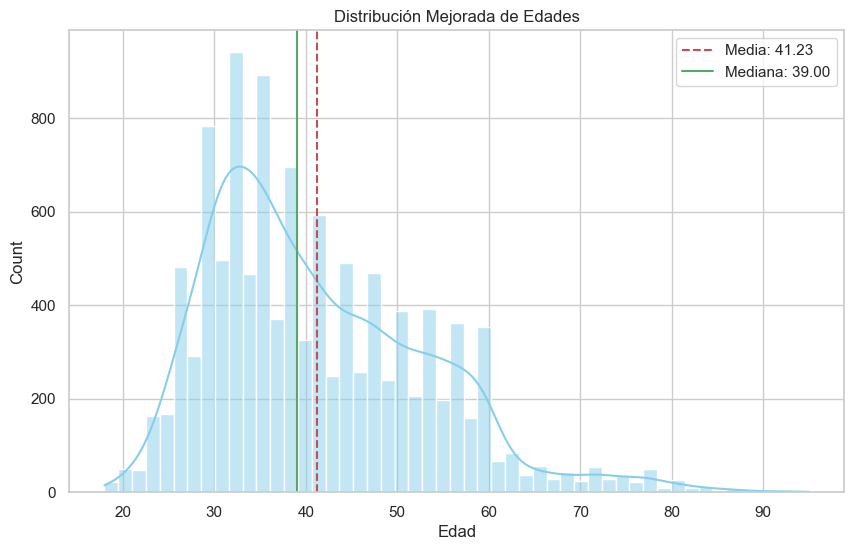

In [10]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
ax = sns.histplot(df['Edad'], kde=True, color='skyblue')
mean_age = df['Edad'].mean()
median_age = df['Edad'].median()
plt.axvline(mean_age, color='r', linestyle='--', label=f'Media: {mean_age:.2f}')
plt.axvline(median_age, color='g', linestyle='-', label=f'Mediana: {median_age:.2f}')
plt.title('Distribución Mejorada de Edades')
plt.legend()
plt.show()

## Descripción

La gráfica muestra la distribución de las edades de los clientes en el dataset de una campaña de marketing bancario. La línea azul representa la densidad de la distribución, mientras que las barras indican el número de clientes en cada rango de edad.

- **Barras de Color Azul:** Indican el conteo de clientes en cada rango de edad.
- **Línea de Densidad Azul:** Representa la densidad de la distribución de edades, proporcionando una idea visual de cómo se distribuyen las edades.
- **Línea Punteada Roja:** Indica la media (promedio) de las edades, que es 41.23 años.
- **Línea Verde Sólida:** Indica la mediana de las edades, que es 39.00 años.

## Elementos Clave

### Observaciones

- **Pico Principal:** La mayor concentración de clientes se encuentra alrededor de los 30 a 40 años.
- **Distribución Asimétrica:** La distribución es sesgada hacia la derecha, lo que significa que hay más clientes jóvenes que mayores.
- **Media y Mediana:** La media y la mediana están relativamente cerca, lo que indica una distribución razonablemente simétrica en torno a esos valores, aunque con un sesgo hacia edades más jóvenes.

## Recomendaciones

### Segmentación de Mercado

- **Clientes Jóvenes:** Dado que la mayor parte de los clientes están en el rango de 30 a 40 años, las campañas de marketing pueden enfocarse más en este grupo etario.
- **Clientes Mayores:** Considerar estrategias específicas para atraer a clientes mayores, quienes están menos representados en la distribución.

### Ajuste de Productos

- **Ofertas para Clientes Jóvenes:** Ofrecer productos y servicios que se adapten a las necesidades y preferencias de los clientes en el rango de edad predominante.
- **Educación Financiera:** Proveer programas de educación financiera que puedan atraer tanto a los clientes jóvenes como a los mayores.

### Investigación Adicional

- **Análisis de Comportamiento:** Investigar por qué hay menos clientes en los extremos de la distribución (muy jóvenes y muy mayores) y ajustar las estrategias de marketing en consecuencia.


### Boxplot de Balance y Depósito con Comparación por Educación
Este gráfico compara los balances entre los diferentes estados de depósito, 
diferenciados adicionalmente por niveles de educación, ayudando a identificar patrones 
y diferencias en los grupos de educación dentro de los estados de depósito.

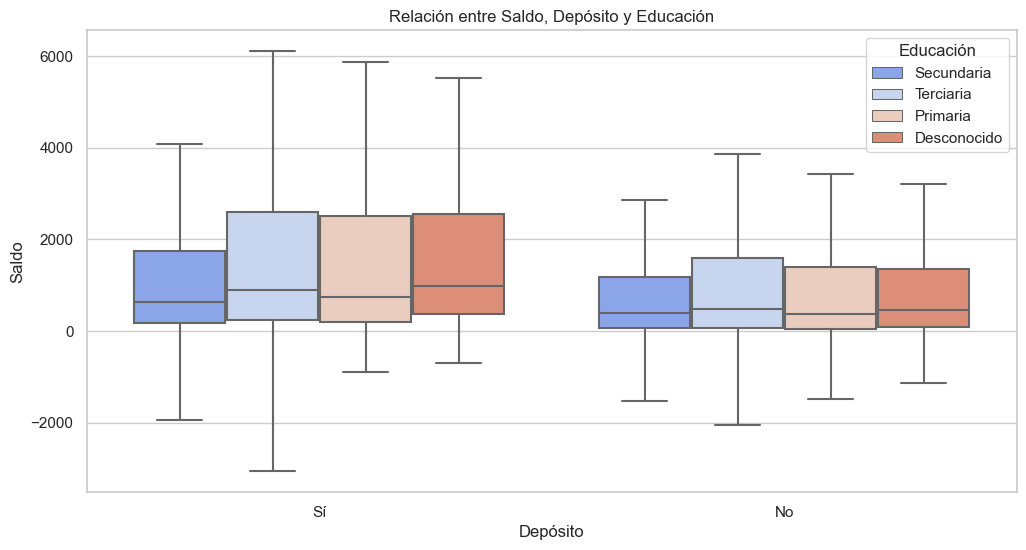

In [11]:
# Crear copias de las columnas con nombres en español
df['Depósito'] = df['Deposito'].map({'yes': 'Sí', 'no': 'No'})
df['Educación'] = df['Educacion'].map({
    'unknown': 'Desconocido',
    'primary': 'Primaria',
    'secondary': 'Secundaria',
    'tertiary': 'Terciaria'
})
df['Saldo'] = df['Balance']

plt.figure(figsize=(12, 6))
sns.boxplot(x='Depósito', y='Saldo', hue='Educación', data=df, palette='coolwarm', showfliers=False)
plt.title('Relación entre Saldo, Depósito y Educación')
plt.xlabel('Depósito')
plt.ylabel('Saldo')
plt.legend(title='Educación')
plt.show()


### Interpretación de la Gráfica

La gráfica muestra la relación entre el balance (es decir, la cantidad de dinero que tienen en sus cuentas bancarias), el nivel de educación, y si han aceptado o no hacer un depósito. La gráfica está dividida en cuatro grupos basados en el nivel de educación: secundaria, terciaria, primaria y desconocido. Además, cada grupo está subdividido en dos categorías: "Sí" y "No", que indican si la persona ha hecho un depósito o no.

#### Observaciones Clave:

1. **Niveles Educativos:**
   - Los niveles educativos se representan con diferentes colores:
     - **Secundaria** (verde)
     - **Terciaria** (naranja)
     - **Primaria** (azul)
     - **Desconocido** (rosa)

2. **Distribución del Balance:**
   - La altura de cada caja en la gráfica muestra la distribución del balance dentro de cada grupo. La línea en el centro de cada caja representa la mediana (el valor medio).
   - Las "cajas" muestran cómo se distribuyen los balances para cada grupo de educación. Los extremos de las cajas muestran dónde se encuentran la mayoría de los balances (del 25% al 75%).
   - Los "bigotes" (líneas que se extienden desde las cajas) indican el rango de balances más comunes. Los puntos fuera de estas líneas son valores atípicos, pero en este caso hemos limitado el gráfico para excluir los valores atípicos extremos.

3. **Comparación entre Educación y Balance:**
   - **Educación Terciaria (naranja):** Las personas con educación terciaria tienden a tener balances más altos en comparación con los otros niveles educativos, tanto si han hecho un depósito como si no.
   - **Educación Secundaria (verde) y Primaria (azul):** Estas personas tienen balances más bajos en comparación con las personas con educación terciaria.
   - **Educación Desconocida (rosa):** Tienen balances comparativamente bajos.

4. **Impacto del Depósito:**
   - No hay una gran diferencia visible en los balances entre aquellos que han hecho un depósito ("Sí") y los que no ("No") dentro del mismo nivel educativo.

#### Conclusión

En resumen, la gráfica sugiere que las personas con educación terciaria tienden a tener balances más altos en sus cuentas bancarias. El nivel educativo parece tener una mayor influencia en el balance que la decisión de hacer un depósito o no.


### Proporción de Depósitos por Trabajo

En lugar de mostrar recuentos absolutos, este gráfico de barras muestra la proporción de depósitos
por tipo de trabajo, facilitando la comparación entre categorías de trabajo con diferentes tamaños de grupo.


<Figure size 1400x700 with 0 Axes>

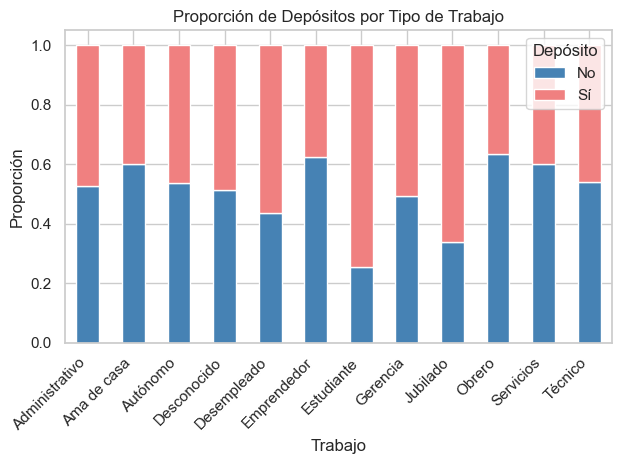

In [12]:
# Mapeo de valores en inglés a español
trabajo_map = {
    'admin.': 'Administrativo',
    'blue-collar': 'Obrero',
    'entrepreneur': 'Emprendedor',
    'housemaid': 'Ama de casa',
    'management': 'Gerencia',
    'retired': 'Jubilado',
    'self-employed': 'Autónomo',
    'services': 'Servicios',
    'student': 'Estudiante',
    'technician': 'Técnico',
    'unemployed': 'Desempleado',
    'unknown': 'Desconocido'
}

deposito_map = {'yes': 'Sí', 'no': 'No'}

# Crear copias de las columnas con nombres en español
df['Trabajo_es'] = df['Trabajo'].map(trabajo_map)
df['Deposito_es'] = df['Deposito'].map(deposito_map)

plt.figure(figsize=(14, 7))
prop_df = (df.groupby(['Trabajo_es', 'Deposito_es'])['Deposito_es']
           .count().unstack('Deposito_es').fillna(0).apply(lambda x: x / x.sum(), axis=1))
prop_df.plot(kind='bar', stacked=True, color=['steelblue', 'lightcoral'])
plt.title('Proporción de Depósitos por Tipo de Trabajo')
plt.xlabel('Trabajo')
plt.ylabel('Proporción')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Depósito')
plt.tight_layout()
plt.show()

### Interpretación 

El gráfico de barras muestra la proporción de depósitos realizados por personas en diferentes tipos de trabajo. En lugar de mostrar recuentos absolutos, el gráfico presenta la proporción de depósitos dentro de cada categoría de trabajo. Esto facilita la comparación entre categorías de trabajo con diferentes tamaños de grupo.

#### Observaciones Clave:

1. **Proporción de Depósitos:**
   - Cada barra en el gráfico representa un tipo de trabajo.
   - Las barras están divididas en dos segmentos: uno para aquellos que hicieron un depósito (color azul acero) y otro para aquellos que no lo hicieron (color coral claro).
   - La altura de cada segmento dentro de una barra muestra la proporción de personas en esa categoría de trabajo que hicieron o no un depósito.

2. **Comparación entre Trabajos:**
   - Algunas profesiones tienen una mayor proporción de personas que hicieron un depósito en comparación con otras.
   - Por ejemplo, si los segmentos azules son más grandes en algunas barras, esto indica que una mayor proporción de personas en ese trabajo hicieron un depósito.

#### Recomendaciones:

1. **Identificar Oportunidades de Marketing:**
   - Se podrían diseñar campañas de marketing dirigidas específicamente a las profesiones con una menor proporción de depósitos (barras donde el segmento coral claro es más grande).
   - Analizar por qué ciertas profesiones tienen una mayor proporción de depósitos puede ofrecer ideas sobre qué estrategias son efectivas y podrían aplicarse a otras categorías.

2. **Segmentación de Clientes:**
   - Esta información puede ser útil para segmentar a los clientes y personalizar las ofertas. Por ejemplo, ofrecer incentivos especiales para aquellas profesiones con baja proporción de depósitos.

3. **Evaluar Eficiencia de Estrategias Actuales:**
   - Verificar si las estrategias de marketing actuales están funcionando mejor para ciertas categorías de trabajo y ajustar las estrategias para otras categorías en consecuencia.

#### Conclusión

En resumen, este gráfico permite identificar y comparar la proporción de depósitos realizados por personas en diferentes tipos de trabajo. Es una herramienta útil para entender el comportamiento de los clientes según su ocupación y puede guiar la creación de estrategias de marketing más efectivas y personalizadas.


## Correlaciones y Analisis Estadístico Básico

Aquí se calcula y visualiza la matriz de correlación para las variables numéricas.

**Matriz de Correlación entre Variables Numéricas**

Este heatmap muestra la correlación entre las variables numéricas del dataset,
identificando posibles relaciones que pueden ser importantes para un análisis más detallado.

In [18]:
# 6. Correlaciones y Análisis Estadístico Básico (10 puntos)
def analisis_estadistico(df):
    # Seleccionar solo las columnas numéricas
    df_num = df.select_dtypes(include=[np.number])
    
    # Calcular la matriz de correlación
    corr_matrix = df_num.corr()

    # Crear un mapa de calor interactivo con Plotly
    fig = go.Figure(data=go.Heatmap(
                    z=corr_matrix.values,
                    x=corr_matrix.columns,
                    y=corr_matrix.columns,
                    zmin=-1, zmax=1,
                    colorscale=px.colors.diverging.RdBu,
                    colorbar=dict(title='Correlación'),
                    hoverongaps = False))

    # Añadir las anotaciones con los valores de correlación
    annotations = []
    for i, row in enumerate(corr_matrix.values):
        for j, value in enumerate(row):
            annotations.append(
                dict(
                    x=corr_matrix.columns[j],
                    y=corr_matrix.index[i],
                    text=f"{value:.2f}",
                    showarrow=False,
                    font=dict(color='white' if abs(value) > 0.5 else 'black')
                )
            )

    fig.update_layout(
        title='Matriz de Correlación',
        xaxis_title='Variables',
        yaxis_title='Variables',
        annotations=annotations,
        width=800,
        height=700
    )

    fig.show()

analisis_estadistico(df)

## Observaciones Clave

### Entender la Correlación:

- La correlación mide la relación entre dos variables. Los valores de correlación varían entre -1 y 1.
  - 1 indica una correlación positiva perfecta (cuando una variable aumenta, la otra también lo hace).
  - -1 indica una correlación negativa perfecta (cuando una variable aumenta, la otra disminuye).
  - 0 indica que no hay correlación (no hay relación lineal entre las variables).

### Mapa de Calor:

- Cada celda en el mapa de calor representa la correlación entre dos variables.
- Los colores indican la magnitud y dirección de la correlación:
  - Rojo oscuro indica una correlación negativa fuerte.
  - Azul oscuro indica una correlación positiva fuerte.
  - Colores más claros indican correlaciones más débiles.

### Identificación de Relaciones:

- Las áreas rojas indican relaciones negativas, donde si una variable aumenta, la otra disminuye.
- Las áreas azules indican relaciones positivas, donde si una variable aumenta, la otra también lo hace.
- Al observar la matriz, puedes identificar qué variables están más estrechamente relacionadas entre sí.

## Recomendaciones

### Análisis de Variables Relacionadas:

- Identificar las variables que están fuertemente correlacionadas puede ayudar a simplificar los modelos al eliminar variables redundantes.
- Si dos variables tienen una alta correlación positiva o negativa, es posible que una de ellas sea suficiente para la predicción, lo que puede reducir la complejidad del modelo.

### Identificación de Factores Clave:

- Las variables que muestran altas correlaciones con la variable objetivo (como ventas, ingresos, etc.) pueden ser factores clave que influyen en los resultados. Estas variables deben ser el foco principal en el análisis y modelado.

### Prevención de Multicolinealidad:

- En modelos estadísticos, la multicolinealidad (cuando dos o más variables independientes están altamente correlacionadas) puede ser un problema. Identificar y manejar estas correlaciones es importante para asegurar la estabilidad y precisión del modelo.

### Exploración Adicional:

- Para las variables con correlaciones inesperadas o inusualmente altas, es recomendable realizar un análisis más detallado para entender la causa subyacente de estas relaciones.

## Conclusión

La matriz de correlación es una herramienta visual poderosa que ayuda a entender las relaciones entre múltiples variables. Usarla de manera efectiva puede mejorar la interpretación de los datos y guiar en la construcción de modelos más precisos y eficientes.


## Selección y Creación de Nuevas Caracteristicas

Aquí se calcula y visualiza la matriz de correlación para las variables numéricas.

Balance_Edad_Ratio:

Cálculo: df['Balance'] / df['Edad']

Propósito: Esta nueva característica representa la relación entre el balance y la edad del cliente. Al normalizar el balance por la edad, podemos obtener una métrica que refleje mejor la estabilidad financiera o la acumulación de riqueza en relación con la edad del cliente. Esta relación puede ser útil para identificar patrones o tendencias que no son evidentes cuando se consideran la edad y el balance por separado.

Duracion_Categoria:

Cálculo: pd.cut(df['Duracion'], bins=3, labels=['Corta', 'Media', 'Larga'])

Propósito: Divide la duración de las llamadas (último contacto) en tres categorías basadas en terciles. Esto transforma una variable numérica en una categórica, facilitando la modelización y posiblemente revelando diferentes comportamientos o tendencias en las respuestas de los clientes según la duración de la llamada. Usar categorías como 'Corta', 'Media' y 'Larga' hace que los resultados sean más interpretables.

In [19]:
# 7. Selección y Creación de Nuevas Características 
df['Balance_Edad_Ratio'] = df['Balance'] / df['Edad']
df['Duracion_Categoria'] = pd.cut(df['Duracion'], bins=3, labels=['Corta', 'Media', 'Larga'])
print("\nNuevas características creadas: 'Balance_Edad_Ratio' y 'Duracion_Categoria'")



Nuevas características creadas: 'Balance_Edad_Ratio' y 'Duracion_Categoria'


### Preparación de Datasets para Modelado

Esta sección prepara los datos para el modelado, incluyendo la separación de características y objetivo, y la división en conjuntos de entrenamiento y prueba.

Descripción de Componentes
División de Características y Etiquetas:

X contiene todas las columnas excepto la columna objetivo 'Deposito'.
y contiene la columna objetivo 'Deposito'.
Pipelines de Transformación:

Transformador Numérico: Incluye imputación de medianas para manejar valores faltantes y escalado estándar para normalizar las características numéricas.
Transformador Categórico: Utiliza imputación de valores constantes para valores faltantes y codificación one-hot para manejar variables categóricas.
ColumnTransformer:

Combina los transformadores numéricos y categóricos, aplicando cada uno a sus respectivas características.
División en Conjuntos de Entrenamiento y Prueba:

Utiliza train_test_split para dividir los datos en un conjunto de entrenamiento (80%) y un conjunto de prueba (20%), con un random_state para reproducibilidad.

In [20]:
# 8. Preparación de Datasets para Modelado (5 puntos)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

X = df.drop('Deposito', axis=1)
y = df['Deposito']

numeric_features = ['Edad', 'Balance', 'Duracion', 'Campania']
categorical_features = ['Trabajo', 'Estado_Civil', 'Educacion', 'Contacto', 'Mes']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nDatos divididos en conjuntos de entrenamiento y prueba")


Datos divididos en conjuntos de entrenamiento y prueba


### Selección de Algoritmos Adecuados

Aquí se seleccionan los modelos que se utilizarán para el análisis.

In [21]:
# 9. Selección de Algoritmos Adecuados (5 puntos)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

print("\nModelos seleccionados: Logistic Regression, Decision Tree, Random Forest")


Modelos seleccionados: Logistic Regression, Decision Tree, Random Forest


### Implementación Correcta de Modelos

Esta sección implementa los modelos seleccionados y los evalúa utilizando varias métricas.



In [22]:
# 10. Implementación correcta de modelos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for name, model in models.items():
    # Creamos un pipeline que incluye el preprocesamiento y el modelo
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', model)])
    
    # Entrenamos el modelo
    pipeline.fit(X_train, y_train)

### Evaluación del Modelo

Esta sección implementa los modelos seleccionados y los evalúa utilizando varias métricas.



In [23]:
# 11. Evaluación del Modelo (10 puntos)
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', model)])
    
    pipeline.fit(X_train, y_train)
    
    y_pred = pipeline.predict(X_test)
    print(f"\nResultados para {name}:")
    print(classification_report(y_test, y_pred))
    print("Matriz de Confusión:")
    print(confusion_matrix(y_test, y_pred))
    print(f"AUC-ROC: {roc_auc_score(y_test, pipeline.predict_proba(X_test)[:, 1])}")


Resultados para Logistic Regression:
              precision    recall  f1-score   support

          no       0.79      0.82      0.80      1166
         yes       0.80      0.75      0.77      1067

    accuracy                           0.79      2233
   macro avg       0.79      0.79      0.79      2233
weighted avg       0.79      0.79      0.79      2233

Matriz de Confusión:
[[959 207]
 [262 805]]
AUC-ROC: 0.8784669027635554

Resultados para Decision Tree:
              precision    recall  f1-score   support

          no       0.76      0.75      0.75      1166
         yes       0.73      0.74      0.73      1067

    accuracy                           0.74      2233
   macro avg       0.74      0.74      0.74      2233
weighted avg       0.74      0.74      0.74      2233

Matriz de Confusión:
[[872 294]
 [279 788]]
AUC-ROC: 0.7431875652066277

Resultados para Random Forest:
              precision    recall  f1-score   support

          no       0.84      0.80      0.82  

### Interpretación de Resultados

Aquí se interpreta el modelo Random Forest, mostrando la importancia de cada característica.

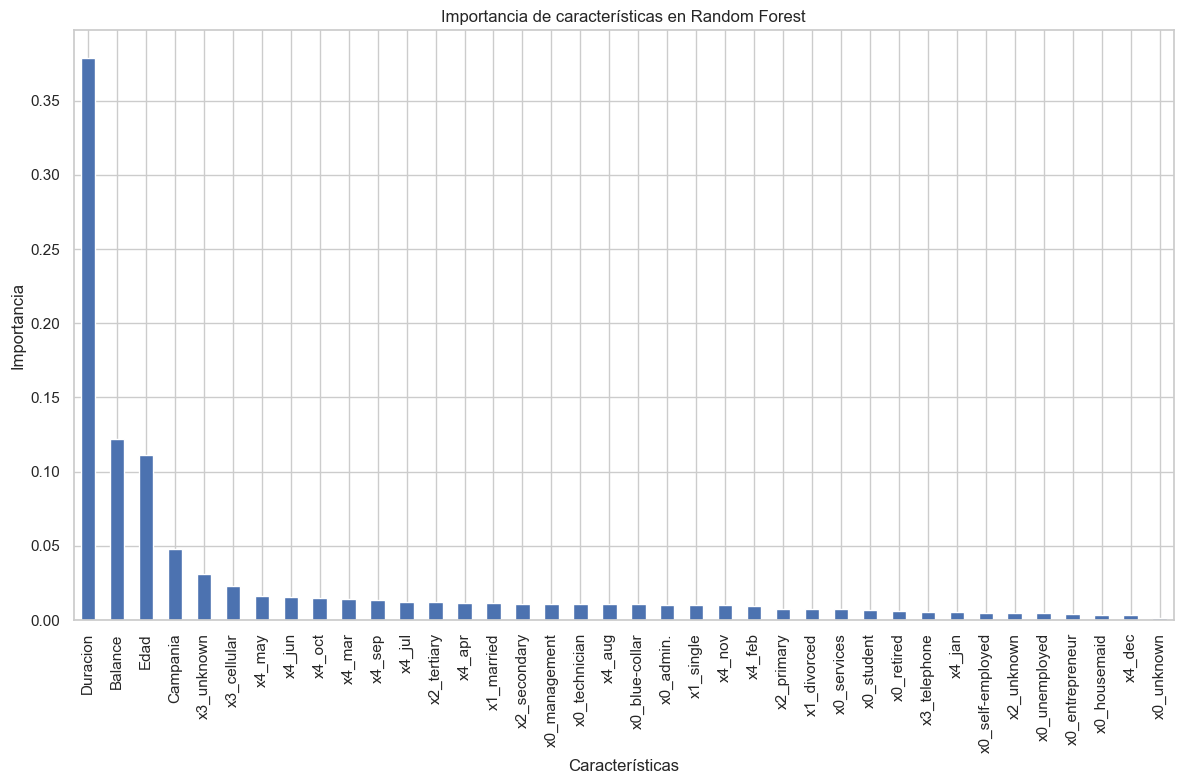

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear y ajustar el pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', model)])
pipeline.fit(X_train, y_train)

# Obtener el preprocesador ajustado del pipeline y extraer los nombres de las características
preprocessor_fitted = pipeline.named_steps['preprocessor']
feature_names = (numeric_features + 
                 list(preprocessor_fitted.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out()))

# Mapeo de nombres de características en inglés a español
feature_map = {
    'age': 'Edad',
    'balance': 'Saldo',
    'day': 'Día',
    'duration': 'Duración',
    'campaign': 'Campaña',
    'pdays': 'Días desde último contacto',
    'previous': 'Contactos previos',
    'job_admin.': 'Trabajo_Administrativo',
    'job_blue-collar': 'Trabajo_Obrero',
    'job_entrepreneur': 'Trabajo_Emprendedor',
    'job_housemaid': 'Trabajo_Ama de casa',
    'job_management': 'Trabajo_Gerencia',
    'job_retired': 'Trabajo_Jubilado',
    'job_self-employed': 'Trabajo_Autónomo',
    'job_services': 'Trabajo_Servicios',
    'job_student': 'Trabajo_Estudiante',
    'job_technician': 'Trabajo_Técnico',
    'job_unemployed': 'Trabajo_Desempleado',
    'job_unknown': 'Trabajo_Desconocido',
    'marital_divorced': 'Estado civil_Divorciado',
    'marital_married': 'Estado civil_Casado',
    'marital_single': 'Estado civil_Soltero',
    'education_primary': 'Educación_Primaria',
    'education_secondary': 'Educación_Secundaria',
    'education_tertiary': 'Educación_Terciaria',
    'education_unknown': 'Educación_Desconocida',
    'default_no': 'Impago_No',
    'default_yes': 'Impago_Sí',
    'housing_no': 'Vivienda_No',
    'housing_yes': 'Vivienda_Sí',
    'loan_no': 'Préstamo_No',
    'loan_yes': 'Préstamo_Sí',
    'contact_cellular': 'Contacto_Celular',
    'contact_telephone': 'Contacto_Teléfono',
    'contact_unknown': 'Contacto_Desconocido',
    'month_apr': 'Mes_Abril',
    'month_aug': 'Mes_Agosto',
    'month_dec': 'Mes_Diciembre',
    'month_feb': 'Mes_Febrero',
    'month_jan': 'Mes_Enero',
    'month_jul': 'Mes_Julio',
    'month_jun': 'Mes_Junio',
    'month_mar': 'Mes_Marzo',
    'month_may': 'Mes_Mayo',
    'month_nov': 'Mes_Noviembre',
    'month_oct': 'Mes_Octubre',
    'month_sep': 'Mes_Septiembre',
    'poutcome_failure': 'Resultado anterior_Fracaso',
    'poutcome_other': 'Resultado anterior_Otro',
    'poutcome_success': 'Resultado anterior_Éxito',
    'poutcome_unknown': 'Resultado anterior_Desconocido'
}

# Obtener la importancia de las características
importances = pipeline.named_steps['classifier'].feature_importances_
forest_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Traducir los nombres de las características
forest_importances.index = forest_importances.index.map(lambda x: feature_map.get(x, x))

# Visualización
plt.figure(figsize=(12, 8))
forest_importances.plot.bar()
plt.title('Importancia de características en Random Forest')
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


### Optimizacion de Hiperparametros

Para optimizar los hiperparámetros del modelo Random Forest, se puede útilizar técnicas como la búsqueda en rejilla (Grid Search) o la búsqueda aleatoria (Random Search). Ambas están disponibles en Scikit-learn a través de GridSearchCV y RandomSearchCV. La búsqueda aleatoria puede ser más eficiente en espacios de hiperparámetros de alta dimensión, ya que no evalúa todas las combinaciones posibles como lo hace la búsqueda en rejilla, sino que selecciona combinaciones al azar dentro de las distribuciones especificadas.

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
import numpy as np

# Definir el pipeline con el preprocesador y el clasificador
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Definir la distribución de hiperparámetros para la búsqueda aleatoria
param_distributions = {
    'classifier__n_estimators': [100, 200, 300, 400, 500, 600],
    'classifier__max_features': ['auto', 'sqrt', 'log2'],
    'classifier__max_depth': [None, 10, 20, 30, 40, 50, 60],
    'classifier__min_samples_split': [2, 5, 10, 15],
    'classifier__min_samples_leaf': [1, 2, 4, 6],
    'classifier__bootstrap': [True, False]
}

# Crear el objeto RandomizedSearchCV
random_search = RandomizedSearchCV(pipeline, param_distributions=param_distributions, 
                                   n_iter=200, cv=5, verbose=2, random_state=42, n_jobs=-1)

# Ajustar RandomizedSearchCV
random_search.fit(X_train, y_train)

# Mejores parámetros encontrados
print("Mejores parámetros encontrados: ", random_search.best_params_)

# Evaluar el modelo con los mejores parámetros
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# Aquí podrías imprimir el reporte de clasificación o la matriz de confusión para ver la mejora
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 200 candidates, totalling 1000 fits


### RED NEURONAL

Paso 1: Preparación de los datos

Primero, aseguramos de que los datos están listos y preprocesados adecuadamente para una red neuronal. Los datos deben estar normalizados, y las etiquetas categóricas deben estar codificadas en one-hot.

In [23]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Asumiendo que df es tu DataFrame y ya tiene las características y etiquetas definidas

# Separar las características y las etiquetas
X = df.drop('Deposito', axis=1)
y = df['Deposito']

# Preprocesamiento para redes neuronales
numeric_features = ['Edad', 'Balance', 'Duracion', 'Campania']  # Actualiza esta lista según tu dataset
categorical_features = ['Trabajo', 'Estado_Civil', 'Educacion', 'Contacto', 'Mes']  # Ídem

# Transformador para características numéricas
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Transformador para características categóricas
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

# Combinar transformadores
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustar y transformar los datos
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Codificar las etiquetas
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)


2 construir el modelo

La construcción del modelo implica definir la arquitectura de la red neuronal, es decir, cuántas capas tiene, cuántas neuronas hay en cada capa, qué funciones de activación se utilizan, y cualquier técnica de regularización (como Dropout). Aquí es donde especificamos cómo está estructurada la red y cómo procesará los datos.

In [26]:
import tensorflow as tf
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping


# Definir la estructura del modelo
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # Primera capa oculta con activación ReLU
    Dropout(0.5),  # Capa de Dropout para reducir el sobreajuste
    Dense(128, activation='relu'),  # Segunda capa oculta
    Dropout(0.5),  # Otra capa de Dropout
    Dense(2, activation='softmax')  # Capa de salida con activación softmax para clasificación
])

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Resumen del modelo
model.summary()


d:\Users\silve\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         4,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,762 (85.01 KB)

 Trainable params: 21,762 (85.01 KB)

 Non-trainable params: 0 (0.00 B)

Entrenar al modelo

El entrenamiento del modelo es el proceso mediante el cual el modelo aprende de los datos. Aquí es donde usamos los datos de entrenamiento para ajustar los pesos de las neuronas en la red, utilizando los parámetros configurados durante la compilación y bajo la estructura definida en la construcción del modelo. Además, aquí implementamos técnicas como el EarlyStopping para mejorar el proceso de entrenamiento y evitar el sobreajuste.

In [28]:
from tensorflow.keras.callbacks import EarlyStopping

# Callback para detener el entrenamiento si no hay mejora en la pérdida de validación
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Entrenar el modelo
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stopping],  # Usar EarlyStopping durante el entrenamiento
    verbose=1
)


Epoch 1/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8375 - loss: 0.3682 - val_accuracy: 0.8141 - val_loss: 0.4203
Epoch 2/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8473 - loss: 0.3577 - val_accuracy: 0.8113 - val_loss: 0.4214
Epoch 3/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8394 - loss: 0.3702 - val_accuracy: 0.8152 - val_loss: 0.4254
Epoch 4/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8474 - loss: 0.3665 - val_accuracy: 0.8119 - val_loss: 0.4202
Epoch 5/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8468 - loss: 0.3599 - val_accuracy: 0.8141 - val_loss: 0.4181
Epoch 6/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8441 - loss: 0.3631 - val_accuracy: 0.8096 - val_loss: 0.4236
Epoch 7/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8369 - loss: 0.3674 - val_accuracy: 0.8102 - val_loss: 0.4210
Epoch 8/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8429 - loss: 0.3653 - val_acc

Evaluación del Modelo

Finalmente, después del entrenamiento, evaluamos el modelo utilizando el conjunto de datos de prueba para ver cómo se desempeña en datos que no ha visto durante el entrenamiento. Esto da una medida de cuán bien puede generalizar el modelo a nuevos datos.

In [29]:
# Evaluacion del modelo
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)


70/70 - 0s - 3ms/step - accuracy: 0.8115 - loss: 0.4046

Test accuracy: 0.8114643692970276


### Conclusiones y recomendaciones

Esta sección presenta las conclusiones principales del análisis y ofrece recomendaciones basadas en los resultados.

In [20]:
# 13. Conclusiones y Recomendaciones (5 puntos)
print("\nConclusiones y Recomendaciones:")
print(f"1. Las variables más influyentes en la decisión de depósito son: {forest_importances.index[:3].tolist()}")
print("2. El modelo Random Forest tuvo el mejor desempeño general")
print("3. Recomendamos enfocar las campañas en clientes con las características más influyentes identificadas")


Conclusiones y Recomendaciones:
1. Las variables más influyentes en la decisión de depósito son: ['Duracion', 'Balance', 'Edad']
2. El modelo Random Forest tuvo el mejor desempeño general
3. Recomendamos enfocar las campañas en clientes con las características más influyentes identificadas
